##Kóðar fyrir lokaverkefni

#Preprocessing á gögnum

In [ ]:
import pandas as pd

# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Read the CSV file
df = pd.read_csv('2020-2023gogn.csv')





In [ ]:
import pandas as pd


df = pd.read_csv('2020-2023gogn.csv')
team_id_df = pd.read_csv('team_ids.csv')

team_id_mapping = dict(zip(team_id_df['team_x'], team_id_df['Team_ID']))

df['Team_ID_x'] = df['team_x'].map(team_id_mapping)

df['Team_ID_opp'] = df['opp_team_name'].map(team_id_mapping)



df.to_csv('2020-2023gogn_with_ids.csv', index=False)

In [ ]:


import pandas as pd


df1 = pd.read_csv('teamstrength2021.csv')
df2 = pd.read_csv('teamstrength2122.csv')
df3 = pd.read_csv('teamstrength2223.csv')

df1['Season'] = '2020-21'
df2['Season'] = '2021-22'
df3['Season'] = '2022-23'

teamstrength_df = pd.concat([df1, df2, df3], ignore_index=True)

desired_columns = ['Season', 'name', 'short_name', 'strength_overall_home', 'strength_overall_away',
                   'strength_attack_home', 'strength_attack_away', 'strength_defence_home',
                   'strength_defence_away']


teamstrength_df =teamstrength_df[desired_columns]

team_id_df = pd.read_csv('team_ids.csv')
team_id_mapping = dict(zip(team_id_df['team_x'], team_id_df['Team_ID']))

# Map the team names to their respective Team_ID in the 'name' column
teamstrength_df['Team_ID_x'] = teamstrength_df['name'].map(team_id_mapping)

print(teamstrength_df)


print(teamstrength_df)




In [ ]:
import pandas as pd

# Read the CSV files
df = pd.read_csv('2020-2023gogn_with_ids.csv')


# Merge df with teamstrength_df to add strength stats for home team
df_home = pd.merge(df[df['was_home']], teamstrength_df, left_on=['Team_ID_x', 'season_x'], right_on=['Team_ID_x', 'Season'], suffixes=('', '_home'))

# Merge df with teamstrength_df to add strength stats for away team
df_away = pd.merge(df[~df['was_home']], teamstrength_df, left_on=['Team_ID_opp', 'season_x'], right_on=['Team_ID_x', 'Season'], suffixes=('', '_away'))

# Define renaming function based on the 'was_home' flag
def rename_columns(df, suffix):
    if suffix == '_home':
        rename_mapping = {
            'strength_overall_home': 'team_x_strength_overall',
            'strength_attack_home': 'team_x_strength_attack',
            'strength_defence_home': 'team_x_strength_defence',
            'strength_overall_away': 'opp_team_strength_overall',
            'strength_attack_away': 'opp_team_strength_attack',
            'strength_defence_away': 'opp_team_strength_defence'
        }
    else:
        rename_mapping = {
            'strength_overall_away': 'team_x_strength_overall',
            'strength_attack_away': 'team_x_strength_attack',
            'strength_defence_away': 'team_x_strength_defence',
            'strength_overall_home': 'opp_team_strength_overall',
            'strength_attack_home': 'opp_team_strength_attack',
            'strength_defence_home': 'opp_team_strength_defence'
        }
    df.rename(columns=rename_mapping, inplace=True)

# Rename columns for home and away teams
if df_home.shape[0] > 0:
    rename_columns(df_home, '_home')

if df_away.shape[0] > 0:
    rename_columns(df_away, '_away')

# Update the desired_columns list
desired_columns = [
    'season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps', 'clean_sheets',
    'creativity', 'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
    'influence', 'kickoff_time', 'minutes', 'opponent_team', 'opp_team_name', 'own_goals',
    'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
    'team_a_score', 'team_h_score', 'threat', 'total_points', 'transfers_balance',
    'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards', 'GW',
    'Team_ID_x', 'Team_ID_opp',
    'team_x_strength_overall', 'team_x_strength_attack', 'team_x_strength_defence',
    'opp_team_strength_overall', 'opp_team_strength_attack', 'opp_team_strength_defence'
]



# Concatenate the desired columns from df_home and df_away
df_final = pd.concat([df_home[desired_columns], df_away[desired_columns]]).sort_index()

# Save the DataFrame to a new CSV file
df_final.to_csv('2020-2023gognin.csv', index=False)


print("Columns in df:", df_final.columns)



df_final.head()





Columns in df: Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW', 'Team_ID_x', 'Team_ID_opp',
       'team_x_strength_overall', 'team_x_strength_attack',
       'team_x_strength_defence', 'opp_team_strength_overall',
       'opp_team_strength_attack', 'opp_team_strength_defence'],
      dtype='object')


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,Team_ID_x,Team_ID_opp,team_x_strength_overall,team_x_strength_attack,team_x_strength_defence,opp_team_strength_overall,opp_team_strength_attack,opp_team_strength_defence
0,2020-21,Aaron Connolly,FWD,Brighton,0,0,-3,0,0.3,78,7,2,0,3.4,1.2,2020-09-14T19:15:00Z,45,5,Chelsea,0,0,0,0,1,0,32205,3.0,1.0,32.0,1,0,0,0,55,True,0,1,3,7,1130,1150,1100,1130,1190,1130
0,2020-21,Abdoulaye Doucouré,MID,Everton,0,0,20,1,44.6,512,4,0,0,6.9,20.4,2020-09-13T15:30:00Z,90,17,Spurs,0,0,0,0,1,0,143040,1.0,0.0,4.0,3,0,0,0,55,False,0,1,9,21,1250,1170,1290,1190,1130,1250
1,2020-21,Alex Iwobi,MID,Everton,0,0,0,0,0.0,159,4,0,0,0.0,0.0,2020-09-13T15:30:00Z,0,17,Spurs,0,0,0,0,1,0,10789,1.0,0.0,0.0,0,0,0,0,60,False,0,1,9,21,1250,1170,1290,1190,1130,1250
1,2020-21,Aaron Mooy,MID,Brighton,0,0,0,0,0.0,60,7,0,0,0.0,0.0,2020-09-14T19:15:00Z,0,5,Chelsea,0,0,0,0,1,0,2010,3.0,1.0,0.0,0,0,0,0,50,True,0,1,3,7,1130,1150,1100,1130,1190,1130
2,2020-21,Adam Lallana,MID,Brighton,0,0,6,0,27.2,54,7,1,0,3.6,6.8,2020-09-14T19:15:00Z,44,5,Chelsea,0,0,0,0,1,0,78657,3.0,1.0,2.0,1,0,0,0,65,True,0,1,3,7,1130,1150,1100,1130,1190,1130


In [ ]:
import pandas as pd

# Read the CSV file
file_path = '2020-2023gognin.csv'
data = pd.read_csv(file_path)

# Drop the 'round' column
data.drop(columns=['round'], inplace=True)

# Sort the data by 'gameweek' and 'season'
sorted_data = data.sort_values(by=['season_x', 'GW'])


# Save the sorted data back to a CSV file
sorted_file_path = 'sorted_2020-2023gognin.csv'
sorted_data.to_csv(sorted_file_path, index=False)

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,Team_ID_x,Team_ID_opp,team_x_strength_overall,team_x_strength_attack,team_x_strength_defence,opp_team_strength_overall,opp_team_strength_attack,opp_team_strength_defence,player_id,year,month,day_of_month,day_of_week,time
0,2020-21,Aaron Connolly,3.0,Brighton,0,0,-3,0,0.3,78,7,2,0,3.4,1.2,2020-09-14 19:15:00+00:00,45,5,Chelsea,0,0,0,0,0,32205,3.0,1.0,32.0,1,0,0,0,55,1,0,1,3,7,1130,1150,1100,1130,1190,1130,0,2020,9,14,0,1915
1,2020-21,Abdoulaye Doucouré,2.0,Everton,0,0,20,1,44.6,512,4,0,0,6.9,20.4,2020-09-13 15:30:00+00:00,90,17,Spurs,0,0,0,0,0,143040,1.0,0.0,4.0,3,0,0,0,55,0,0,1,9,21,1250,1170,1290,1190,1130,1250,8,2020,9,13,6,1530
2,2020-21,Alex Iwobi,2.0,Everton,0,0,0,0,0.0,159,4,0,0,0.0,0.0,2020-09-13 15:30:00+00:00,0,17,Spurs,0,0,0,0,0,10789,1.0,0.0,0.0,0,0,0,0,60,0,0,1,9,21,1250,1170,1290,1190,1130,1250,36,2020,9,13,6,1530
3,2020-21,Aaron Mooy,2.0,Brighton,0,0,0,0,0.0,60,7,0,0,0.0,0.0,2020-09-14 19:15:00+00:00,0,5,Chelsea,0,0,0,0,0,2010,3.0,1.0,0.0,0,0,0,0,50,1,0,1,3,7,1130,1150,1100,1130,1190,1130,4,2020,9,14,0,1915
4,2020-21,Adam Lallana,2.0,Brighton,0,0,6,0,27.2,54,7,1,0,3.6,6.8,2020-09-14 19:15:00+00:00,44,5,Chelsea,0,0,0,0,0,78657,3.0,1.0,2.0,1,0,0,0,65,1,0,1,3,7,1130,1150,1100,1130,1190,1130,14,2020,9,14,0,1915


##Þjálfun á módelum






In [ ]:
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)


Shape of X: (53421, 43)
Shape of y: (53421,)


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

data= pd.read_csv('sorted_2020-2023gognin.csv')

#Gefa leikmönnum tölur
data['player_id'] = data['name'].astype('category').cat.codes

# breyta tímanum sem leiknum var spilað í tíma,dag,ár
data['kickoff_time'] = pd.to_datetime(data['kickoff_time'])
data['year'] = data['kickoff_time'].dt.year
data['month'] = data['kickoff_time'].dt.month
data['day_of_month'] = data['kickoff_time'].dt.day
data['day_of_week'] = data['kickoff_time'].dt.dayofweek
data['time'] = data['kickoff_time'].dt.hour * 100 + data['kickoff_time'].dt.minute
#breyta hvort liðið spilaði heima úr True/False 'i 1/0
data['was_home'] = data['was_home'].astype(int)

#Breyta leikstöðum í númer
position_mapping = {'GK': 0, 'DEF': 1, 'MID': 2, 'FWD': 3}
data['position'] = data['position'].map(position_mapping)

columns = data.columns
print(columns)
# Check the dimensions of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Index(['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW', 'Team_ID_x', 'Team_ID_opp', 'team_x_strength_overall',
       'team_x_strength_attack', 'team_x_strength_defence',
       'opp_team_strength_overall', 'opp_team_strength_attack',
       'opp_team_strength_defence', 'player_id', 'year', 'month',
       'day_of_month', 'day_of_week', 'time'],
      dtype='object')
Shape of X: (76216, 471)
Shape of y: (76316,)


Mean Squared Error test: 0.8622611051461961
Mean Squared Error train: 5.789382569609189


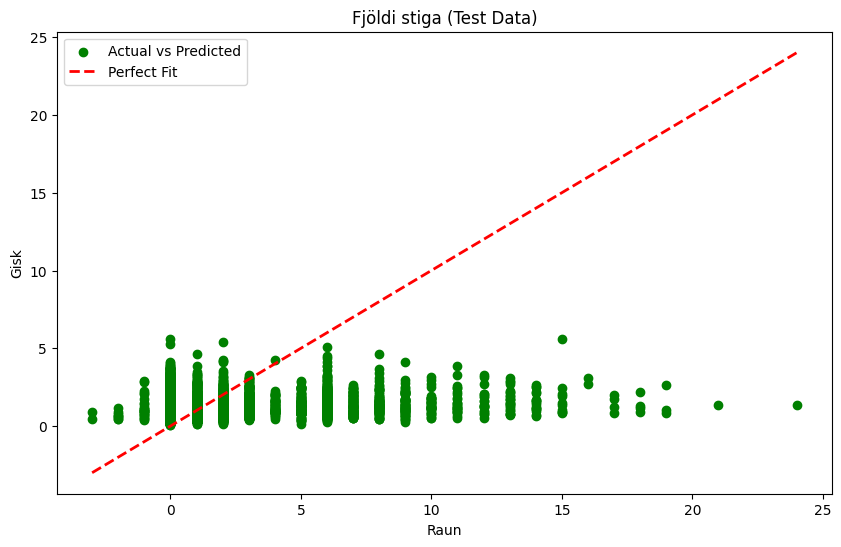

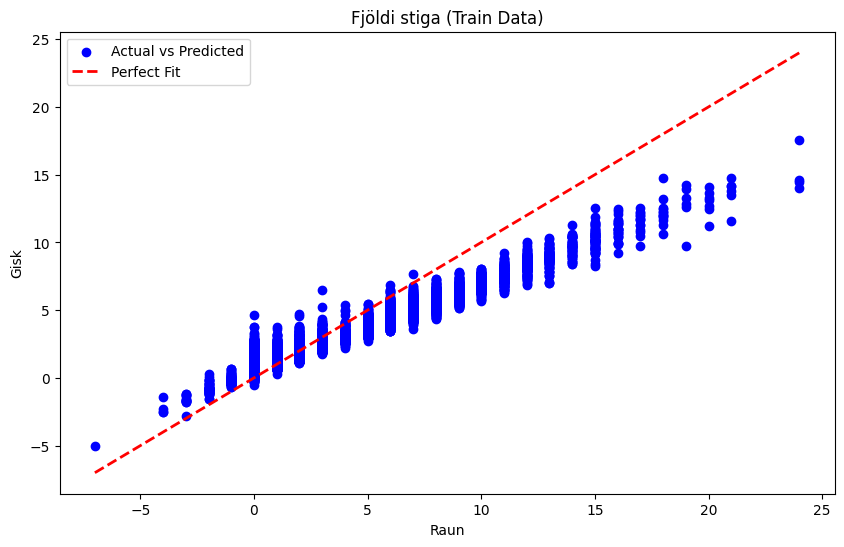

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('sorted_2020-2023gognin.csv')

# Convert 'name' to category and create 'player_id'
data['player_id'] = data['name'].astype('category').cat.codes

# Convert 'kickoff_time' to datetime and extract time-based features
data['kickoff_time'] = pd.to_datetime(data['kickoff_time'])
data['year'] = data['kickoff_time'].dt.year
data['month'] = data['kickoff_time'].dt.month
data['day_of_month'] = data['kickoff_time'].dt.day
data['day_of_week'] = data['kickoff_time'].dt.dayofweek
data['time'] = data['kickoff_time'].dt.hour * 100 + data['kickoff_time'].dt.minute

# Convert 'was_home' to integer
data['was_home'] = data['was_home'].fillna(0).astype(int)


# Label Encoding for 'season_x'
label_encoder = LabelEncoder()
data['season_x_encoded'] = label_encoder.fit_transform(data['season_x'])

# One-Hot Encoding for other categorical columns
categorical_cols = ['team_x', 'opp_team_name', 'fixture']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Map 'position' to numeric values
position_mapping = {'GK': 0, 'DEF': 1, 'MID': 2, 'FWD': 3}
data['position'] = data['position'].map(position_mapping)

# Define target and features
target = 'total_points'
X = data.drop(columns=[target, 'name', 'kickoff_time', 'season_x', 'element'])
y = data[target]

# Drop rows with NaN values introduced by lagging
X = X.dropna()

# Shift the target variable one position to predict one round ahead
y = y.shift(-1).dropna()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[:-1])  # Remove the last row to match y
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# MSE train
mse_value = mse(y_train, y_train_pred)
print(f"Mean Squared Error test: {mse_value}")

# Calculate MSE
mse_value = mse(y_test, y_pred)
print(f"Mean Squared Error train: {mse_value}")

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Sort feature importances
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]





plt.figure(figsize=(10, 6))
plt.title("Fjöldi stiga (Test Data)")
plt.scatter(y_test, y_pred, color='green', label='Actual vs Predicted')
plt.xlabel("Raun")
plt.ylabel("Gisk")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2, label='Perfect Fit')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.title("Fjöldi stiga (Train Data)")
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted')  # Fixed y_train_pred here
plt.xlabel("Raun")
plt.ylabel("Gisk")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red', linewidth=2, label='Perfect Fit')
plt.legend()
plt.show()



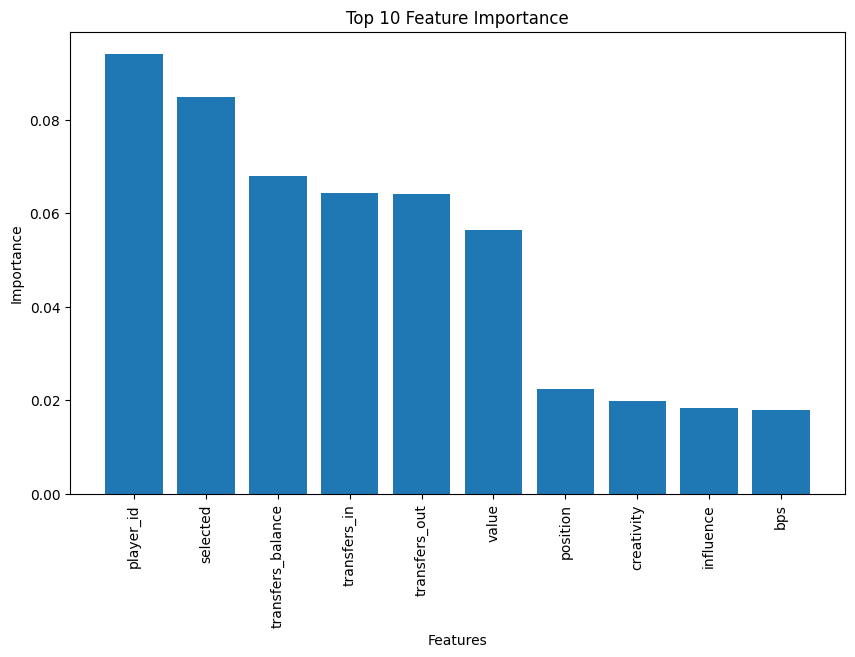

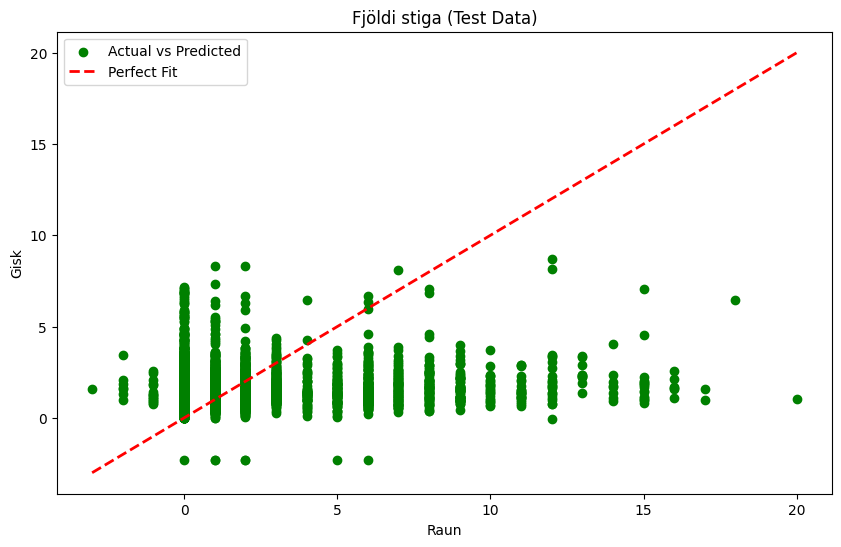

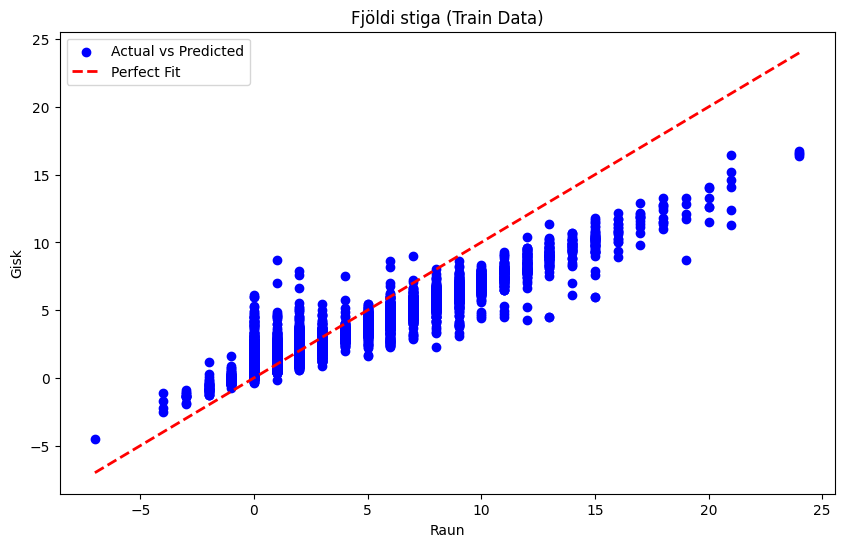

Mean Squared Error train: 0.9276235140067415
Mean Squared Error test: 6.330389711230248


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- GW
- Team_ID_opp
- Team_ID_x
- assists
- bonus
- ...


In [ ]:
# Plot feature importances for top 10 features
# Sort feature importances
indices = np.argsort(importances)[::-1]
top_n = 10  # Number of top features to use
selected_features = [features[i] for i in indices][:top_n]


plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importance")
plt.bar(range(top_n), importances[indices][:top_n])
plt.xticks(range(top_n), [names[i] for i in range(top_n)], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')

plt.show()

# Select only the top 10 features
X_selected = X_scaled[selected_features]

# Split the data using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X_selected):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_predtr = model.predict(X_train)

# Plot actual vs predicted for test data
plt.figure(figsize=(10, 6))
plt.title("Fjöldi stiga (Test Data)")
plt.scatter(y_test, y_pred, color='green', label='Actual vs Predicted')
plt.xlabel("Raun")
plt.ylabel("Gisk")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2, label='Perfect Fit')
plt.legend()
plt.show()

# Plot actual vs predicted for train data
plt.figure(figsize=(10, 6))
plt.title("Fjöldi stiga (Train Data)")
plt.scatter(y_train, y_predtr, color='blue', label='Actual vs Predicted')
plt.xlabel("Raun")
plt.ylabel("Gisk")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red', linewidth=2, label='Perfect Fit')
plt.legend()
plt.show()


# Calculate MSE
mse_value = mse(y_train, y_predtr)
print(f"Mean Squared Error train: {mse_value}")
# Calculate MSE
mse_value = mse(y_test, y_pred)
print(f"Mean Squared Error test: {mse_value}")

# Predict points for all players using the trained model
data['Predicted Points'] = model.predict(X_scaled)

# Filter data for season 2022-23 and GW 1
filtered_data = data[(data['season_x'] == '2022-23') & (data['GW'] == 1)]

# Sort data based on predicted points in descending order
filtered_data = filtered_data.sort_values(by='Predicted Points', ascending=False)

# Display top 10 players' predicted points versus actual points
top_10 = filtered_data.head(10)[['name', 'total_points', 'Predicted Points']]
print(top_10)

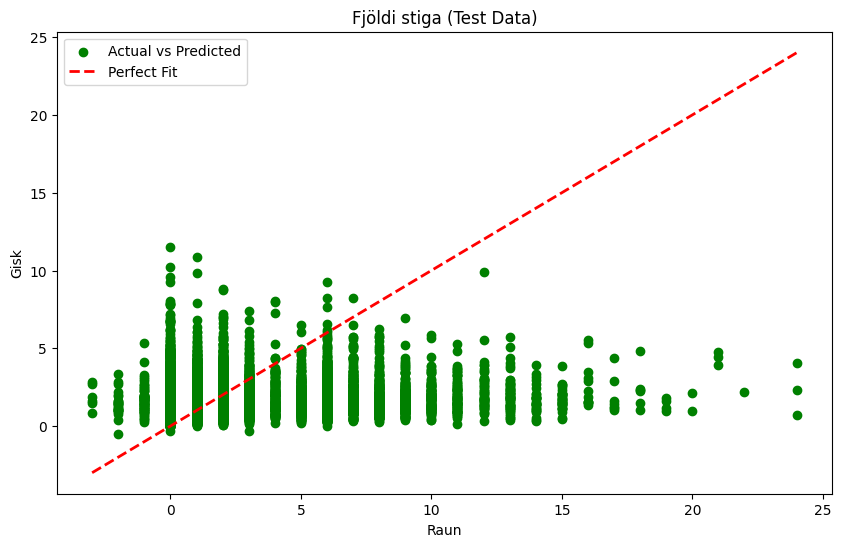

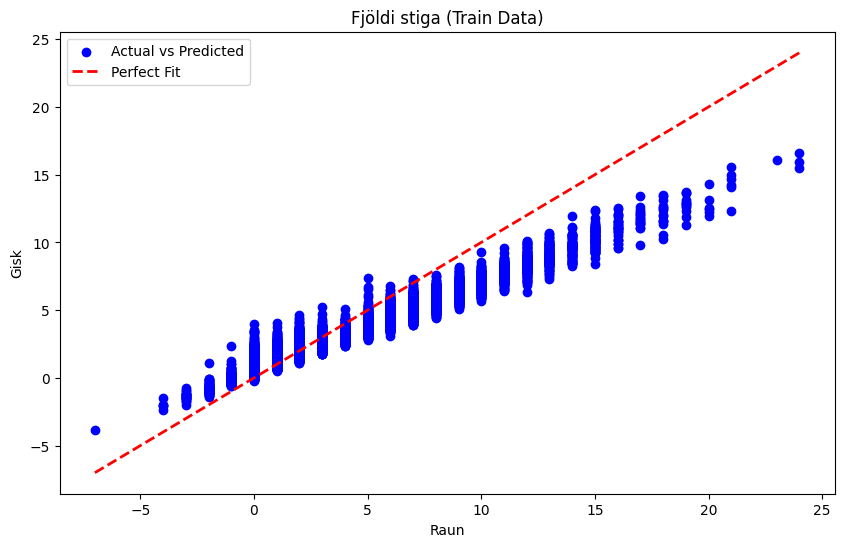

Train R-squared: 0.869090849005338
Test R-squared: 0.05466521327574703
Mean Squared Error (MSE) for train set: 0.771678822934801
Mean Squared Error (MSE) for test set: 5.537991168377375


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, r2_score
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('sorted_2020-2023gognin.csv')

# Define target and features
target = 'total_points'
X = data.select_dtypes(include=[np.number]).drop(columns=[target])
y = data[target]

# Drop rows with NaN values introduced by lagging
X = X.dropna()

# Shift the target variable one position to predict one round ahead
y = y.shift(-1).dropna()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[:-1])  # Remove the last row to match y
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y, test_size=0.3, random_state=42)

# Train the initial model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Sort feature importances
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

# Select top k features (e.g., top 10 features)
k = 10
selected_features = names[:k]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the model with selected features
model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
model_selected.fit(X_train_selected, y_train)

# Get predictions
predictions = model_selected.predict(X_train_selected)
predictionstr = model_selected.predict(X_test_selected)

# Plot actual vs predicted for test data
plt.figure(figsize=(10, 6))
plt.title("Fjöldi stiga (Test Data)")
plt.scatter(y_test, predictionstr, color='green', label='Actual vs Predicted')
plt.xlabel("Raun")
plt.ylabel("Gisk")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2, label='Perfect Fit')
plt.legend()
plt.show()

# Plot actual vs predicted for train data
plt.figure(figsize=(10, 6))
plt.title("Fjöldi stiga (Train Data)")
plt.scatter(y_train, predictions, color='blue', label='Actual vs Predicted')
plt.xlabel("Raun")
plt.ylabel("Gisk")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red', linewidth=2, label='Perfect Fit')
plt.legend()
plt.show()

# Calculate R-squared for train set
R2_train = r2_score(y_train, predictions)
print("Train R-squared:", R2_train)

# Calculate R-squared for test set
R2_test = r2_score(y_test, predictionstr)
print("Test R-squared:", R2_test)

# Calculate and print the Mean Squared Error (MSE) for the train set
MSE_train = mse(y_train, predictions)
print("Mean Squared Error (MSE) for train set:", MSE_train)

# Calculate and print the Mean Squared Error (MSE) for the test set
MSE_test = mse(y_test, predictionstr)
print("Mean Squared Error (MSE) for test set:", MSE_test)




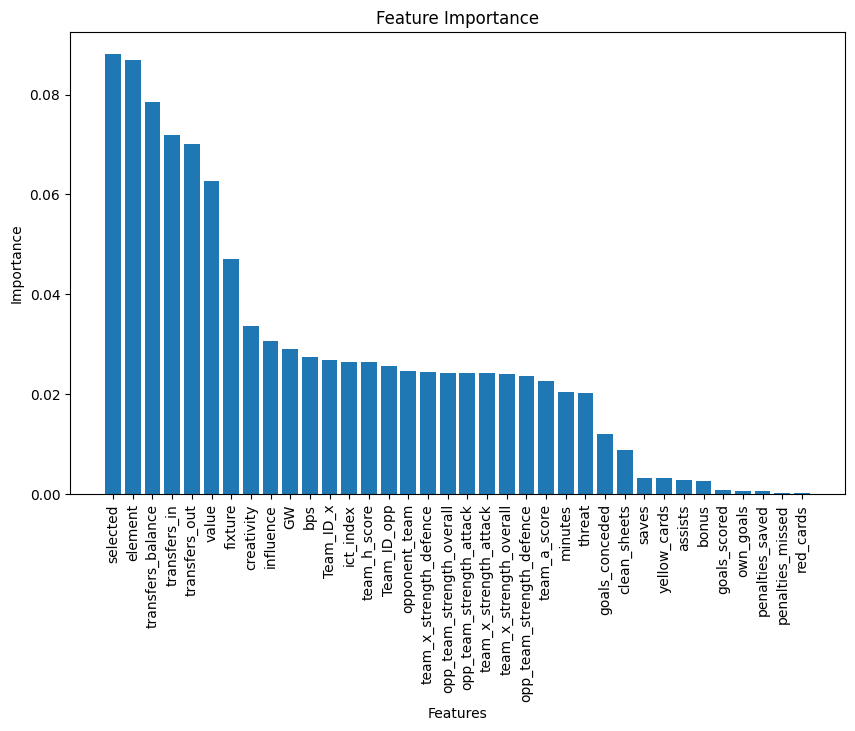

In [ ]:
# Get feature importances
importances = model.feature_importances_
features = X.columns

# Sort feature importances
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
predictionstr = model.predict(X_test)
predictions = model.predict(X_train)


#XGboost

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 1}


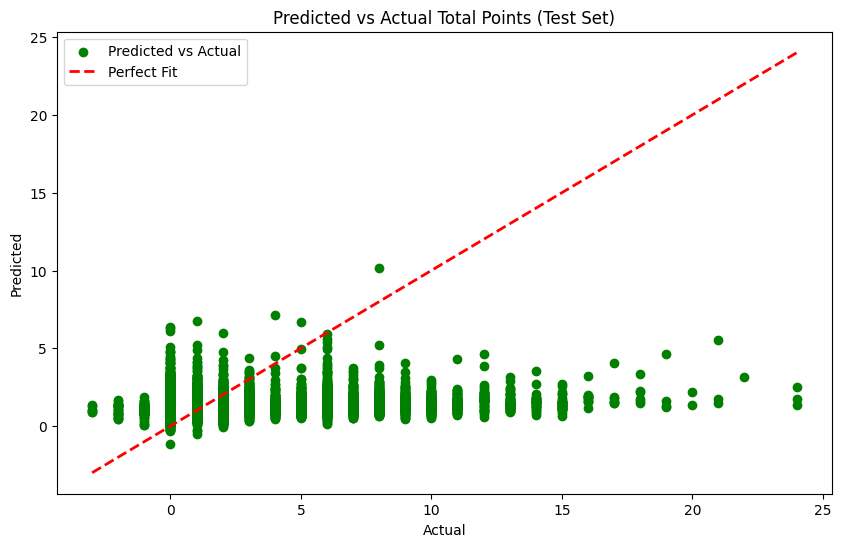

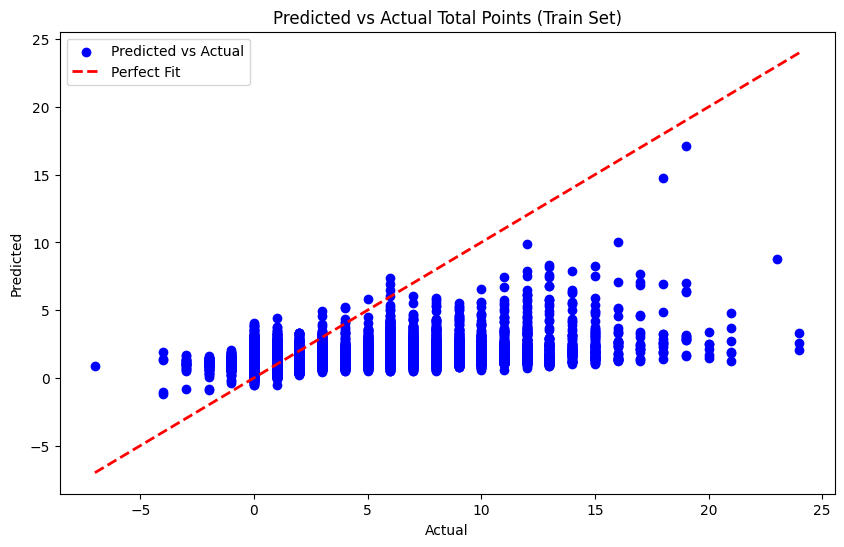

Mean Squared Error (MSE) for Train Set: 5.077355850343926
Mean Squared Error (MSE) for Test Set: 5.602700334645389


ValueError: Length of values (76316) does not match length of index (76317)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('sorted_2020-2023gognin.csv')
# Define target and features
target = 'total_points'


X = data.select_dtypes(include=[np.number]).drop(columns=[target])
y = data[target]


X = X.dropna()

# færa y gildið um einn til að spá um næstu leiki
y = y.shift(-1).dropna()

# hreinsa síðustu röð til að passa að það er jafnt við y
X = X[:-1]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1],
}

# Initialize XGBoost Regressor
xgb_regressor = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(X_train, y_train)

# Make predictions for test set
predictions = best_xgb_regressor.predict(X_test)
y_train_pred = best_xgb_regressor.predict(X_train)

# Plot predictions vs actual for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='green', label='Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Total Points (Test Set)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2, label='Perfect Fit')
plt.legend()
plt.show()

# Plot predictions vs actual for train set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Total Points (Train Set)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red', linewidth=2, label='Perfect Fit')
plt.legend()
plt.show()

# Calculate and print the Mean Squared Error (MSE) for the train and test sets
MSE_train = mse(y_train, y_train_pred)
print("Mean Squared Error (MSE) for Train Set:", MSE_train)

MSE_test = mse(y_test, predictions)
print("Mean Squared Error (MSE) for Test Set:", MSE_test)

# Predict points for all players using the trained model
data['Predicted Points'] = best_xgb_regressor.predict(X_scaled)

# Filter data for season 2022-23 and GW 1
filtered_data = data[(data['season_x'] == '2022-23') & (data['GW'] == 1)]

# Sort data based on predicted points in descending order
filtered_data = filtered_data.sort_values(by='Predicted Points', ascending=False)

# Display top 10 players' predicted points versus actual points
top_10 = filtered_data.head(10)[['name', 'total_points', 'Predicted Points']]
print(top_10)


#Linuleg aðhvarfsgreining

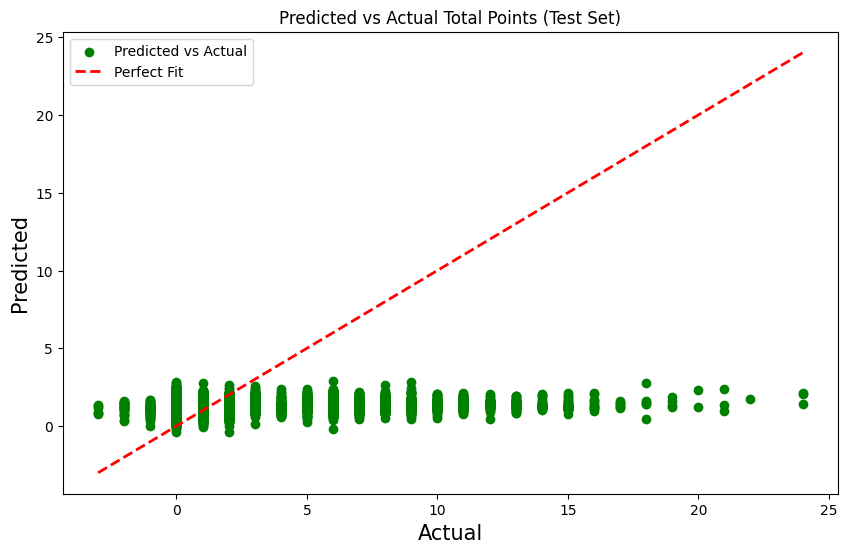

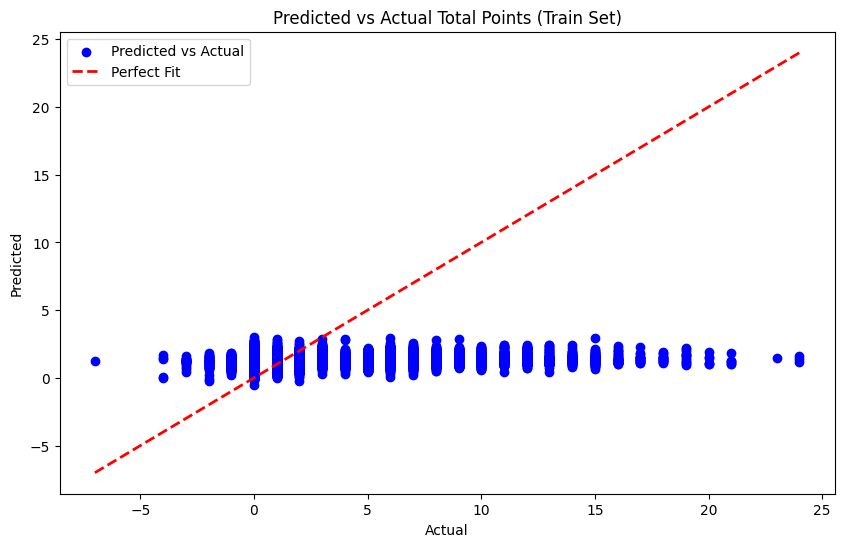

Mean Squared Error (MSE) for Train Set: 5.812371830876551
Mean Squared Error (MSE) for Test Set: 5.773133635983472


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('sorted_2020-2023gognin.csv')

# Define target and features
target = 'total_points'

X = data.select_dtypes(include=[np.number]).drop(columns=[target])
y = data[target]

# Drop rows with NaN values introduced by lagging
X = X.dropna()

# Shift the target variable one position to predict one round ahead
y = y.shift(-1).dropna()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for test set
predictions = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Plot predictions vs actual for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='green', label='Predicted vs Actual')
plt.xlabel('Actual', fontsize = 15)
plt.ylabel('Predicted', fontsize = 15)
plt.title('Predicted vs Actual Total Points (Test Set)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2, label='Perfect Fit')
plt.legend()
plt.show()

# Plot predictions vs actual for train set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Total Points (Train Set)')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red', linewidth=2, label='Perfect Fit')
plt.legend()
plt.show()

MSE_train = mse(y_train, y_train_pred)
print("Mean Squared Error (MSE) for Train Set:", MSE_train)

MSE_test = mse(y_test, predictions)
print("Mean Squared Error (MSE) for Test Set:", MSE_test)



#Gröf


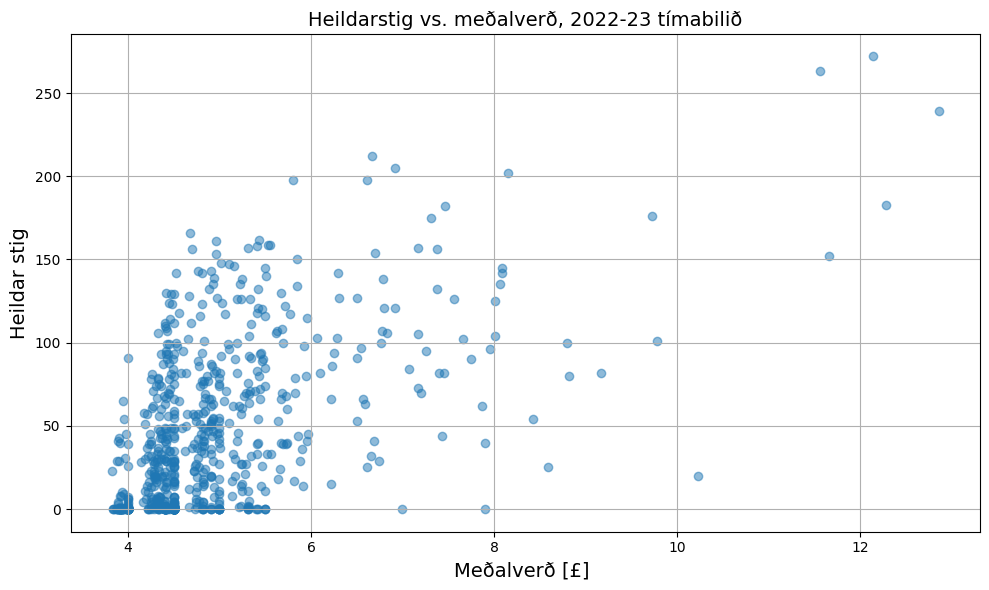

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the extracted seasons data
data = pd.read_csv('sorted_2020-2023gognin.csv')

# Filter data for the 2022-23 season
season_2022_23 = data[data['season_x'] == '2022-23']

# Aggregate data for each player
player_stats = season_2022_23.groupby('name').agg({'total_points': 'sum', 'value': 'mean'}).reset_index()

# Divide 'value' by 10
player_stats['value'] /= 10

# Plot players' total points versus average price
plt.figure(figsize=(10, 6))
plt.scatter(player_stats['value'], player_stats['total_points'], alpha=0.5)
plt.xlabel('Meðalverð [£] ',  fontsize=14)
plt.ylabel('Heildar stig',  fontsize=14)
plt.title('Heildarstig vs. meðalverð, 2022-23 tímabilið',  fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


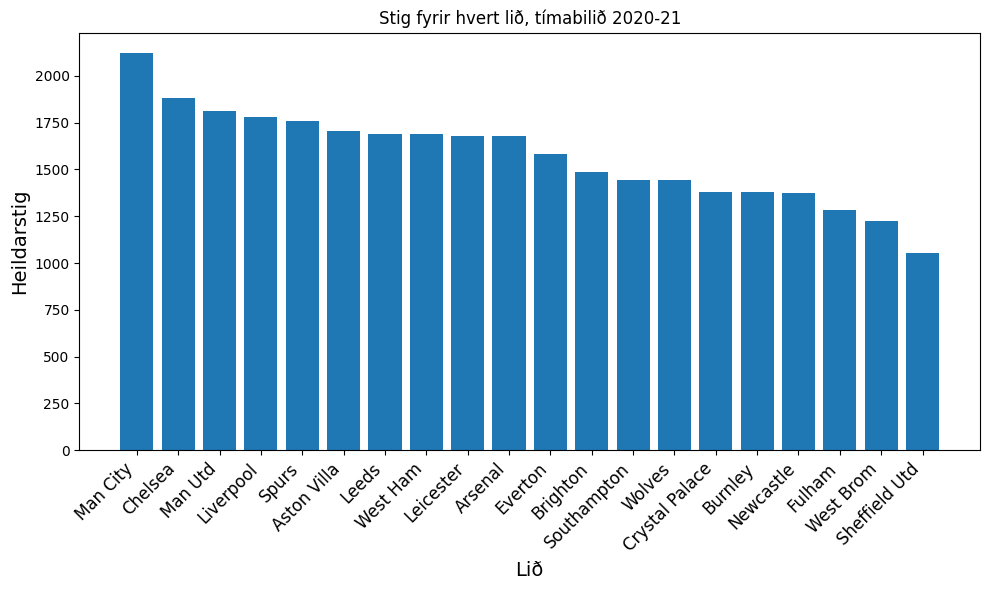

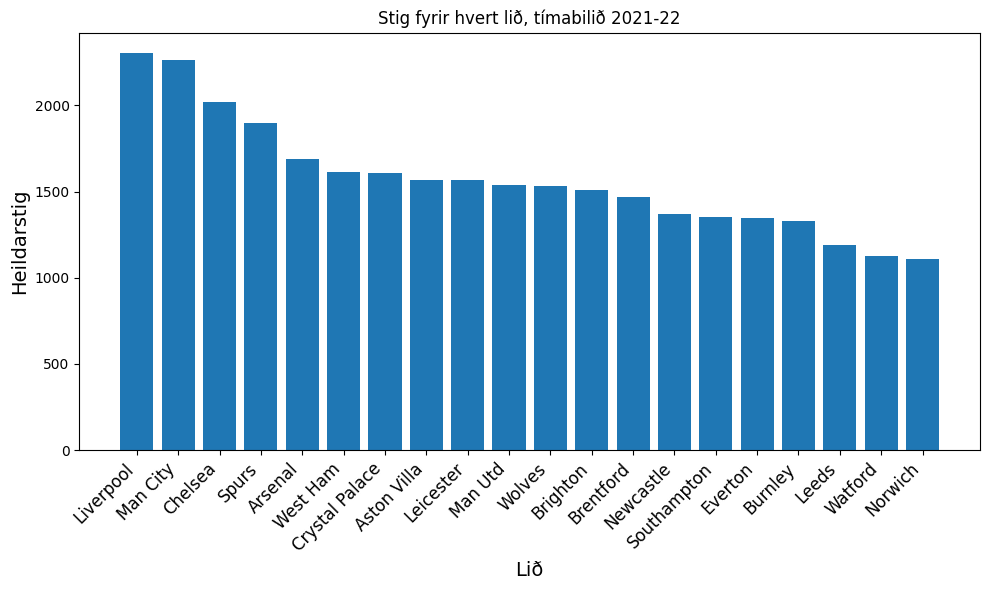

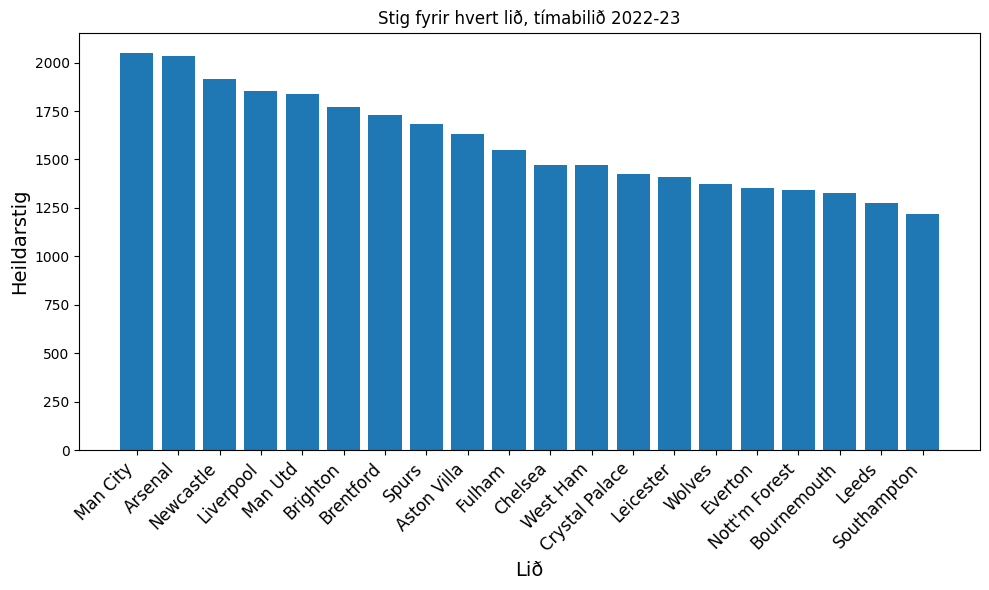

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the filtered CSV file
filtered_df = pd.read_csv('sorted_2020-2023gognin.csv')

# Group the data by season and team, and sum the total points for each team
season_team_points = filtered_df.groupby(['season_x', 'team_x'])['total_points'].sum().reset_index()

# Iterate over each season
for season in season_team_points['season_x'].unique():
    # Filter data for the current season
    season_data = season_team_points[season_team_points['season_x'] == season]

    # Sort teams by combined points
    season_data = season_data.sort_values(by='total_points', ascending=False)

    # Create a bar plot for the current season
    plt.figure(figsize=(10, 6))
    plt.bar(season_data['team_x'], season_data['total_points'])
    plt.xlabel('Lið', fontsize=14)
    plt.ylabel('Heildarstig', fontsize=14)
    plt.title(f'Stig fyrir hvert lið, tímabilið {season}')
    plt.xticks(rotation=45, ha='right')
    plt.tick_params(axis='x', labelsize=12)  # Set label size for x-axis
    plt.tight_layout()

    # Save the figure before showing it
    plt.savefig(f'season_{season}_team_points.png')
    plt.show()
